INF8770 Technologies multimédias

Polytechnique Montréal

Exemple de l'application de la transformée KL sur une image

In [1]:
import numpy as np
import matplotlib.pyplot as py
from numpy import linalg as LA

Lecture d'une image. Image transformée en double précision pour les calculs 

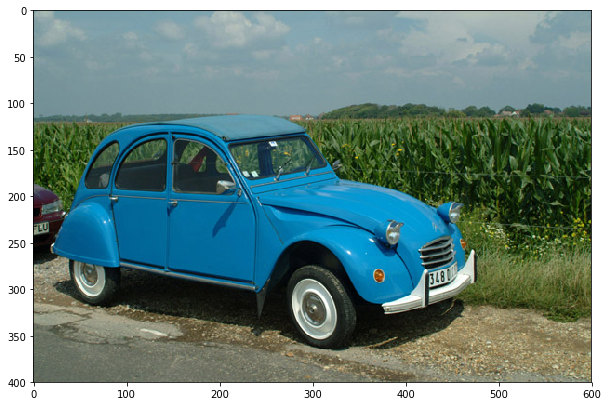

In [2]:
fig1 = py.figure(figsize = (10,10))
imagelue = py.imread('RGB.jpg')
image=imagelue.astype('double')
py.imshow(imagelue)
py.show()

Calcul des valeurs moyennes des RGB. Nécessaire pour calculer la matrice de covariance des RGB

In [3]:
sommeR = 0.0
sommeG = 0.0
sommeB = 0.0
for i in range(len(image)):
    for j in range(len(image[0])):
        sommeR=sommeR+image[i][j][0]
        sommeG=sommeG+image[i][j][1]
        sommeB=sommeB+image[i][j][2]
        
nbPixels = len(image)*len(image[0])        
MoyR= sommeR / nbPixels
MoyG= sommeG / nbPixels
MoyB= sommeB / nbPixels

print MoyR
print MoyG
print MoyB

82.2966666667
113.95685
109.429704167


Calcul de la matrice de covariance des RGB

In [4]:
covRGB = np.zeros((3,3), dtype = "double")
for i in range(len(image)):
    for j in range(len(image[0])):
        vecTemp=[[image[i][j][0] - MoyR], [image[i][j][1]] - MoyG, [image[i][j][2] - MoyB]]
        vecProdTemp = np.dot(vecTemp,np.transpose(vecTemp))
        covRGB = np.add(covRGB,vecProdTemp)

print covRGB

[[  7.66987279e+08   4.73836435e+08   3.31065565e+08]
 [  4.73836435e+08   5.47336721e+08   6.23575771e+08]
 [  3.31065565e+08   6.23575771e+08   9.38162702e+08]]


Calcul des vecteurs propres et valeurs propres

In [5]:
eigval, eigvec = LA.eig(covRGB)
print eigval
print
print eigvec

[  1.71831020e+09   5.10684480e+08   2.34920205e+07]

[[-0.50631607 -0.79641966  0.33069588]
 [-0.55593729  0.00830122 -0.83118279]
 [-0.65922513  0.60468737  0.44696243]]


Pour illustrer les bénéfices du changement de repère, une composante sur trois sera supprimée dans le nouveau repère. a=Mb, où b est la composant RGB - la moyenne, M la matrice de transformation de repère, et a est la composante dans l'espace des vecteurs propres. 

In [8]:
eigvec = np.transpose(eigvec)
eigvecsansAxe0 = np.copy(eigvec)
eigvecsansAxe0[0,:] = [0.0,0.0,0.0]
eigvecsansAxe1 = np.copy(eigvec)
eigvecsansAxe1[1,:] = [0.0,0.0,0.0]
eigvecsansAxe2 = np.copy(eigvec)
eigvecsansAxe2[2,:] = [0.0,0.0,0.0]

imageKLsansAxe0 = np.copy(image)
imageKLsansAxe1 = np.copy(image)
imageKLsansAxe2 = np.copy(image)

vecMoy =[MoyR, MoyG, MoyB] 

for i in range(len(image)):
    for j in range(len(image[0])):
        vecTemp=[image[i][j][0], image[i][j][1], image[i][j][2]]
        #a=Mb
        imageKLsansAxe0[i][j][:] = np.reshape(np.dot(eigvecsansAxe0,np.reshape(np.subtract(vecTemp,vecMoy),(3,1))),(3))
        imageKLsansAxe1[i][j][:] = np.reshape(np.dot(eigvecsansAxe1,np.reshape(np.subtract(vecTemp,vecMoy),(3,1))),(3))
        imageKLsansAxe2[i][j][:] = np.reshape(np.dot(eigvecsansAxe2,np.reshape(np.subtract(vecTemp,vecMoy),(3,1))),(3))
                                      


Les images dans les repères définis par les vecteurs propres ne peuvent pas être affichées. Toutefois, en éliminant un axe, on a retiré 33% de l'information. Une composante vaut zéro. Exemple:

In [10]:
print imageKLsansAxe0[10][10][:]

[  0.         -12.82565839   4.8373991 ]


En faisant la transformée inverse, on peut voir les images qui résultent de la compression. b=inv(M)a. Dans le code, on utilse pinv (Pseudo-inverse), car la matrice est parfois singulière. Il faut faire b + moyenne.

In [11]:
invEigvecsansAxe0 = LA.pinv(eigvecsansAxe0);
invEigvecsansAxe1 = LA.pinv(eigvecsansAxe1);
invEigvecsansAxe2 = LA.pinv(eigvecsansAxe2);

imageRGBsansAxe0 = np.copy(image)
imageRGBsansAxe1 = np.copy(image)
imageRGBsansAxe2 = np.copy(image)

for i in range(len(image)):
    for j in range(len(image[0])):
        #b=inv(M)a
        vecTempsansAxe0=[[imageKLsansAxe0[i][j][0]], [imageKLsansAxe0[i][j][1]], [imageKLsansAxe0[i][j][2]]]
        vecTempsansAxe1=[[imageKLsansAxe1[i][j][0]], [imageKLsansAxe1[i][j][1]], [imageKLsansAxe1[i][j][2]]]
        vecTempsansAxe2=[[imageKLsansAxe2[i][j][0]], [imageKLsansAxe2[i][j][1]], [imageKLsansAxe2[i][j][2]]]     
        imageRGBsansAxe0[i][j][:] = np.add(np.reshape(np.dot(invEigvecsansAxe0,vecTempsansAxe0),(3)),vecMoy)
        imageRGBsansAxe1[i][j][:] = np.add(np.reshape(np.dot(invEigvecsansAxe1,vecTempsansAxe1),(3)),vecMoy)
        imageRGBsansAxe2[i][j][:] = np.add(np.reshape(np.dot(invEigvecsansAxe2,vecTempsansAxe2),(3)),vecMoy)

Résultat sans l'axe de plus grande énergie. L'image est très dégradée.

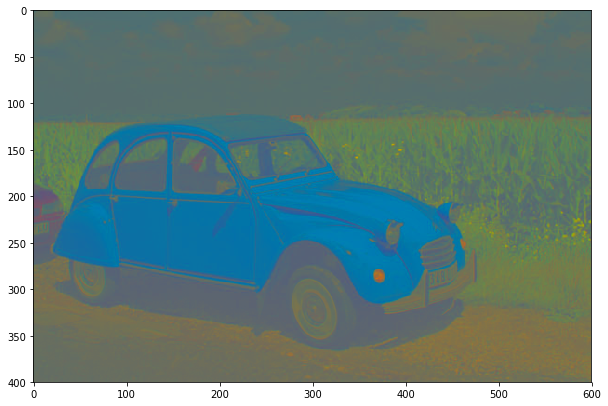

In [12]:
fig2 = py.figure(figsize = (10,10))
imageout = np.clip(imageRGBsansAxe0,0,255)
imageout= imageout.astype('uint8')
py.imshow(imageout)
py.show()

Résultat sans l'axe de moyenne énergie. L'image assez dégradée.

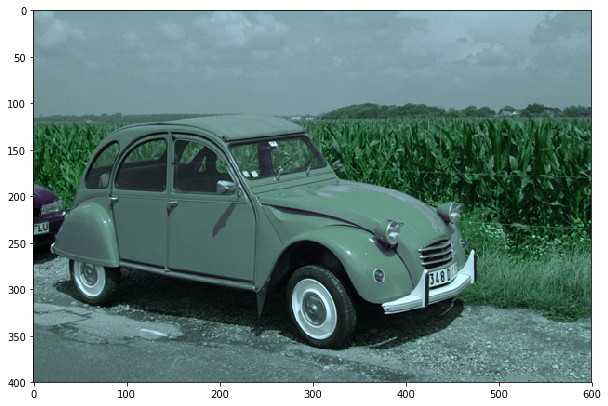

In [13]:
fig2 = py.figure(figsize = (10,10))
imageout = np.clip(imageRGBsansAxe1,0,255)
imageout= imageout.astype('uint8')
py.imshow(imageout)
py.show()

Résultat sans l'axe de faible énergie. L'impact sur l'image est minime.

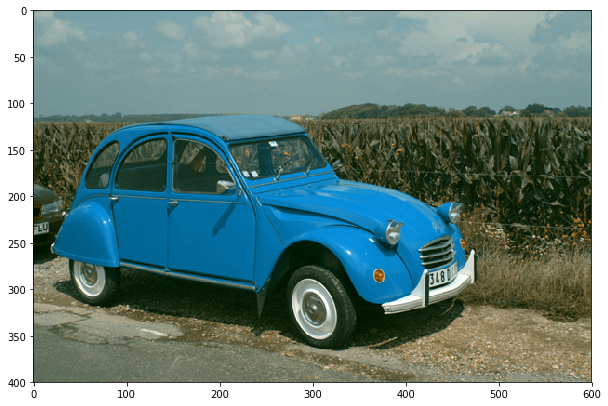

In [14]:
fig2 = py.figure(figsize = (10,10))
imageout = np.clip(imageRGBsansAxe2,0,255)
imageout= imageout.astype('uint8')
py.imshow(imageout)
py.show()